# Testing Classifier Models

In [1]:
# IMPORT REQUIRED PACKAGES
import pandas as pd

# Removing punctuation
import re

# Removing stopwords
import nltk
import nltk.corpus
from nltk.corpus import stopwords

# Tokenizing, lemmatizing
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

# Typo errors
from textblob import TextBlob
from spellchecker import SpellChecker

# Remove emoji's
import pickle
import emot.emo_unicode
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS

#nltk.download('stopwords')

# Test 1

In [203]:
# lOAD DATA
test_data = pd.read_csv("./Data/test_data.csv")
train_data = pd.read_csv("./Data/train_data.csv")

In [204]:
#test_data=test_data.set_index("Index")
#test_data=test_data.drop(index=1464)
test_data.head()

,Index,Total Index,Venue Index,Name,Rating,Date,Review,Accessibility
0,1464,2538,108,Singel,5 stars,a day ago,toprestaurant in hartje amsterdam. gerund door...,0
1,267482,382007,22,Vascobelo V-bar,5 stars,a year ago,since moving into this neighbourhood over 4 ye...,0
2,151893,218098,673,Boulevard Cafe,4 stars,4 years ago,really busy but separate area in the back. tas...,0
3,287946,409599,384,La Oliva Pintxos y Vinos,5 stars,3 years ago,delicious varied food. really great,0
4,53122,77271,21,Koffiespot,5 stars,2 years ago,"really nice and cozy space, good music, delic...",0


In [205]:
train_data=train_data.set_index("Index")
train_data.head()

,Total Index,Venue Index,Name,Rating,Date,Review,Accessibility
Index,,,,,,,
187509,269012,77,Caf√© 't Hooischip,5 stars,4 months ago,a very sweet cafe. you can sit in the corner ...,NaN
76628,111282,162,Stone's Cafe,3 stars,3 years ago,good bar a little bit to crowd it,NaN
3042,4841,141,Puri Mas Indonesisch Restaurant,5 stars,5 years ago,"visited recently, and visited eight years ago,...",NaN
169109,242267,422,d'Vijff Vlieghen,5 stars,3 years ago,"great, tasty food, nice anecdotes from the ow...",NaN
34381,50425,35,Wildschut,3 stars,5 years ago,cafe like any else. has nice charging station ...,NaN


## Clean Data

In [206]:
# Stopwords
stop_words = stopwords.words('english')

# Lemmatizer
lemmatizer = WordNetLemmatizer()

In [228]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def clean_string(text):
    '''Clean string.'''
    
    text = text.lower()
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    
    
    return text

def remove_stopwords(text):
    '''Remove stop words.'''
    
    text_tokens = word_tokenize(text) 
    
    filtered_text = [word for word in text_tokens if not word in stop_words]
    
    return filtered_text

def lemmatize_string(lst):
    '''Lemmatize words in a list.'''
    
    lemma_text = [lemmatizer.lemmatize(word) for word in lst]
       
    return lemma_text

def sen_tokenize(text):
    '''Tokenize sentences.'''
    
    sentences = sent_tokenize(text)
    
    return sentences

In [224]:
sent_tokenize("text hello blabla. hudnaoek. Thjksns")

['text hello blabla.', 'hudnaoek.', 'Thjksns']

In [208]:
# Remove emoji
%%time 
train_data['Cleaned_Review'] = train_data['Review'].apply(remove_emoji)
train_data.head()

CPU times: user 1.44 s, sys: 15 ms, total: 1.45 s
Wall time: 1.48 s


,Total Index,Venue Index,Name,Rating,Date,Review,Accessibility,Cleaned_Review
Index,,,,,,,,
187509,269012,77,Caf√© 't Hooischip,5 stars,4 months ago,a very sweet cafe. you can sit in the corner ...,NaN,a very sweet cafe. you can sit in the corner ...
76628,111282,162,Stone's Cafe,3 stars,3 years ago,good bar a little bit to crowd it,NaN,good bar a little bit to crowd it
3042,4841,141,Puri Mas Indonesisch Restaurant,5 stars,5 years ago,"visited recently, and visited eight years ago,...",NaN,"visited recently, and visited eight years ago,..."
169109,242267,422,d'Vijff Vlieghen,5 stars,3 years ago,"great, tasty food, nice anecdotes from the ow...",NaN,"great, tasty food, nice anecdotes from the ow..."
34381,50425,35,Wildschut,3 stars,5 years ago,cafe like any else. has nice charging station ...,NaN,cafe like any else. has nice charging station ...


In [209]:
# Clean strings
%%time
train_data['Cleaned_Review'] = train_data['Review'].apply(clean_string)
train_data.head()

CPU times: user 5.64 s, sys: 73.5 ms, total: 5.71 s
Wall time: 5.89 s


,Total Index,Venue Index,Name,Rating,Date,Review,Accessibility,Cleaned_Review
Index,,,,,,,,
187509,269012,77,Caf√© 't Hooischip,5 stars,4 months ago,a very sweet cafe. you can sit in the corner ...,NaN,a very sweet cafe you can sit in the corner o...
76628,111282,162,Stone's Cafe,3 stars,3 years ago,good bar a little bit to crowd it,NaN,good bar a little bit to crowd it
3042,4841,141,Puri Mas Indonesisch Restaurant,5 stars,5 years ago,"visited recently, and visited eight years ago,...",NaN,visited recently and visited eight years ago b...
169109,242267,422,d'Vijff Vlieghen,5 stars,3 years ago,"great, tasty food, nice anecdotes from the ow...",NaN,great tasty food nice anecdotes from the owne...
34381,50425,35,Wildschut,3 stars,5 years ago,cafe like any else. has nice charging station ...,NaN,cafe like any else has nice charging station a...


In [210]:
# Remove stopwords + tokenize
%%time
train_data['Tokenized_Review'] = train_data['Cleaned_Review'].apply(remove_stopwords)
train_data.head()

CPU times: user 58.5 s, sys: 3.73 s, total: 1min 2s
Wall time: 1min 6s


,Total Index,Venue Index,Name,Rating,Date,Review,Accessibility,Cleaned_Review,Tokenized_Review
Index,,,,,,,,,
187509,269012,77,Caf√© 't Hooischip,5 stars,4 months ago,a very sweet cafe. you can sit in the corner ...,NaN,a very sweet cafe you can sit in the corner o...,"[sweet, cafe, sit, corner, opposite, national,..."
76628,111282,162,Stone's Cafe,3 stars,3 years ago,good bar a little bit to crowd it,NaN,good bar a little bit to crowd it,"[good, bar, little, bit, crowd]"
3042,4841,141,Puri Mas Indonesisch Restaurant,5 stars,5 years ago,"visited recently, and visited eight years ago,...",NaN,visited recently and visited eight years ago b...,"[visited, recently, visited, eight, years, ago..."
169109,242267,422,d'Vijff Vlieghen,5 stars,3 years ago,"great, tasty food, nice anecdotes from the ow...",NaN,great tasty food nice anecdotes from the owne...,"[great, tasty, food, nice, anecdotes, owner, r..."
34381,50425,35,Wildschut,3 stars,5 years ago,cafe like any else. has nice charging station ...,NaN,cafe like any else has nice charging station a...,"[cafe, like, else, nice, charging, station, po..."


In [213]:
# Lemmatize string
#%%time
train_data['Tokenized_Review'] = train_data['Tokenized_Review'].apply(lemmatize_string)
train_data.head()

,Total Index,Venue Index,Name,Rating,Date,Review,Accessibility,Cleaned_Review,Tokenized_Review
Index,,,,,,,,,
187509,269012,77,Caf√© 't Hooischip,5 stars,4 months ago,a very sweet cafe. you can sit in the corner ...,NaN,a very sweet cafe you can sit in the corner o...,"[sweet, cafe, sit, corner, opposite, national,..."
76628,111282,162,Stone's Cafe,3 stars,3 years ago,good bar a little bit to crowd it,NaN,good bar a little bit to crowd it,"[good, bar, little, bit, crowd]"
3042,4841,141,Puri Mas Indonesisch Restaurant,5 stars,5 years ago,"visited recently, and visited eight years ago,...",NaN,visited recently and visited eight years ago b...,"[visited, recently, visited, eight, year, ago,..."
169109,242267,422,d'Vijff Vlieghen,5 stars,3 years ago,"great, tasty food, nice anecdotes from the ow...",NaN,great tasty food nice anecdotes from the owne...,"[great, tasty, food, nice, anecdote, owner, re..."
34381,50425,35,Wildschut,3 stars,5 years ago,cafe like any else. has nice charging station ...,NaN,cafe like any else has nice charging station a...,"[cafe, like, else, nice, charging, station, po..."


In [231]:
# Sentence tokenization
#%%time 
train_data['Sentences'] = train_data['Review'].apply(sen_tokenize)
train_data.head()

,Total Index,Venue Index,Name,Rating,Date,Review,Accessibility,Cleaned_Review,Tokenized_Review,Polarity,Sentences
Index,,,,,,,,,,,
187509,269012,77,Caf√© 't Hooischip,5 stars,4 months ago,a very sweet cafe. you can sit in the corner ...,NaN,a very sweet cafe you can sit in the corner o...,"[sweet, cafe, sit, corner, opposite, national,...","(0.285, 0.4483333333333334)","[ a very sweet cafe., you can sit in the corne..."
76628,111282,162,Stone's Cafe,3 stars,3 years ago,good bar a little bit to crowd it,NaN,good bar a little bit to crowd it,"[good, bar, little, bit, crowd]","(0.25625, 0.55)",[good bar a little bit to crowd it]
3042,4841,141,Puri Mas Indonesisch Restaurant,5 stars,5 years ago,"visited recently, and visited eight years ago,...",NaN,visited recently and visited eight years ago b...,"[visited, recently, visited, eight, year, ago,...","(0.6333333333333333, 0.5166666666666667)","[visited recently, and visited eight years ago..."
169109,242267,422,d'Vijff Vlieghen,5 stars,3 years ago,"great, tasty food, nice anecdotes from the ow...",NaN,great tasty food nice anecdotes from the owne...,"[great, tasty, food, nice, anecdote, owner, re...","(0.7, 0.875)","[ great, tasty food, nice anecdotes from the o..."
34381,50425,35,Wildschut,3 stars,5 years ago,cafe like any else. has nice charging station ...,NaN,cafe like any else has nice charging station a...,"[cafe, like, else, nice, charging, station, po...","(0.25, 0.375)","[cafe like any else., has nice charging statio..."


## Typo removal

In [199]:
misspelled = spell.unknown("Skyvrapers")
misspelled

{'k', 'p', 'r', 's', 'v'}

In [200]:
def correct_typos(text):
    
    x = TextBlob(text)
    corrected_text = x.correct()
    
    return corrected_text

## Save Cleaned Data

In [232]:
train_data.to_csv("cleaned_train_data.csv")

## First classifier

In [233]:
def text_polarity(text):
    pol = TextBlob(text).sentiment
    
    return pol

In [217]:
text_polarity(" a very sweet cafe you can sit in the corner opposite the national opera ballet and enjoy the conversation i can recommend the bitterballen with cheese as a snack ")


Sentiment(polarity=0.285, subjectivity=0.4483333333333334)

In [234]:
# Get polarity
#%%time
train_data['Polarity'] = train_data['Cleaned_Review'].apply(text_polarity)

In [235]:
train_data.head()

,Total Index,Venue Index,Name,Rating,Date,Review,Accessibility,Cleaned_Review,Tokenized_Review,Polarity,Sentences
Index,,,,,,,,,,,
187509,269012,77,Caf√© 't Hooischip,5 stars,4 months ago,a very sweet cafe. you can sit in the corner ...,NaN,a very sweet cafe you can sit in the corner o...,"[sweet, cafe, sit, corner, opposite, national,...","(0.285, 0.4483333333333334)","[ a very sweet cafe., you can sit in the corne..."
76628,111282,162,Stone's Cafe,3 stars,3 years ago,good bar a little bit to crowd it,NaN,good bar a little bit to crowd it,"[good, bar, little, bit, crowd]","(0.25625, 0.55)",[good bar a little bit to crowd it]
3042,4841,141,Puri Mas Indonesisch Restaurant,5 stars,5 years ago,"visited recently, and visited eight years ago,...",NaN,visited recently and visited eight years ago b...,"[visited, recently, visited, eight, year, ago,...","(0.6333333333333333, 0.5166666666666667)","[visited recently, and visited eight years ago..."
169109,242267,422,d'Vijff Vlieghen,5 stars,3 years ago,"great, tasty food, nice anecdotes from the ow...",NaN,great tasty food nice anecdotes from the owne...,"[great, tasty, food, nice, anecdote, owner, re...","(0.7, 0.875)","[ great, tasty food, nice anecdotes from the o..."
34381,50425,35,Wildschut,3 stars,5 years ago,cafe like any else. has nice charging station ...,NaN,cafe like any else has nice charging station a...,"[cafe, like, else, nice, charging, station, po...","(0.25, 0.375)","[cafe like any else., has nice charging statio..."


In [238]:
from transformers import BertTokenizer

train_BERT = pd.read_csv("cleaned_train_data.csv")

In [239]:
train_BERT.head()

,Index,Total Index,Venue Index,Name,Rating,Date,Review,Accessibility,Cleaned_Review,Tokenized_Review,Polarity,Sentences
0,187509,269012,77,Caf√© 't Hooischip,5 stars,4 months ago,a very sweet cafe. you can sit in the corner ...,NaN,a very sweet cafe you can sit in the corner o...,"['sweet', 'cafe', 'sit', 'corner', 'opposite',...","Sentiment(polarity=0.285, subjectivity=0.44833...","[' a very sweet cafe.', 'you can sit in the co..."
1,76628,111282,162,Stone's Cafe,3 stars,3 years ago,good bar a little bit to crowd it,NaN,good bar a little bit to crowd it,"['good', 'bar', 'little', 'bit', 'crowd']","Sentiment(polarity=0.25625, subjectivity=0.55)",['good bar a little bit to crowd it']
2,3042,4841,141,Puri Mas Indonesisch Restaurant,5 stars,5 years ago,"visited recently, and visited eight years ago,...",NaN,visited recently and visited eight years ago b...,"['visited', 'recently', 'visited', 'eight', 'y...","Sentiment(polarity=0.6333333333333333, subject...","[""visited recently, and visited eight years ag..."
3,169109,242267,422,d'Vijff Vlieghen,5 stars,3 years ago,"great, tasty food, nice anecdotes from the ow...",NaN,great tasty food nice anecdotes from the owne...,"['great', 'tasty', 'food', 'nice', 'anecdote',...","Sentiment(polarity=0.7, subjectivity=0.875)","[' great, tasty food, nice anecdotes from the ..."
4,34381,50425,35,Wildschut,3 stars,5 years ago,cafe like any else. has nice charging station ...,NaN,cafe like any else has nice charging station a...,"['cafe', 'like', 'else', 'nice', 'charging', '...","Sentiment(polarity=0.25, subjectivity=0.375)","['cafe like any else.', 'has nice charging sta..."


In [241]:
# using the low level BERT for our task.
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

def token(text):
    
    tokens = tokenizer.tokenize(text)
    
    return tokens

def token_id(text):
    
    token_id = tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text))
    
    return token_id

In [242]:
train_BERT['Tokens'] = train_BERT['Review'].apply(token)
train_BERT['Token_ID'] = train_BERT['Review'].apply(token_id)
train_BERT.head()

,Index,Total Index,Venue Index,Name,Rating,Date,Review,Accessibility,Cleaned_Review,Tokenized_Review,Polarity,Sentences,Tokens,Token_ID
0,187509,269012,77,Caf√© 't Hooischip,5 stars,4 months ago,a very sweet cafe. you can sit in the corner ...,NaN,a very sweet cafe you can sit in the corner o...,"['sweet', 'cafe', 'sit', 'corner', 'opposite',...","Sentiment(polarity=0.285, subjectivity=0.44833...","[' a very sweet cafe.', 'you can sit in the co...","[a, very, sweet, cafe, ., you, can, sit, in, t...","[1037, 2200, 4086, 7668, 1012, 2017, 2064, 413..."
1,76628,111282,162,Stone's Cafe,3 stars,3 years ago,good bar a little bit to crowd it,NaN,good bar a little bit to crowd it,"['good', 'bar', 'little', 'bit', 'crowd']","Sentiment(polarity=0.25625, subjectivity=0.55)",['good bar a little bit to crowd it'],"[good, bar, a, little, bit, to, crowd, it]","[2204, 3347, 1037, 2210, 2978, 2000, 4306, 2009]"
2,3042,4841,141,Puri Mas Indonesisch Restaurant,5 stars,5 years ago,"visited recently, and visited eight years ago,...",NaN,visited recently and visited eight years ago b...,"['visited', 'recently', 'visited', 'eight', 'y...","Sentiment(polarity=0.6333333333333333, subject...","[""visited recently, and visited eight years ag...","[visited, recently, ,, and, visited, eight, ye...","[4716, 3728, 1010, 1998, 4716, 2809, 2086, 328..."
3,169109,242267,422,d'Vijff Vlieghen,5 stars,3 years ago,"great, tasty food, nice anecdotes from the ow...",NaN,great tasty food nice anecdotes from the owne...,"['great', 'tasty', 'food', 'nice', 'anecdote',...","Sentiment(polarity=0.7, subjectivity=0.875)","[' great, tasty food, nice anecdotes from the ...","[great, ,, ta, ##sty, food, ,, nice, an, ##ec,...","[2307, 1010, 11937, 21756, 2833, 1010, 3835, 2..."
4,34381,50425,35,Wildschut,3 stars,5 years ago,cafe like any else. has nice charging station ...,NaN,cafe like any else has nice charging station a...,"['cafe', 'like', 'else', 'nice', 'charging', '...","Sentiment(polarity=0.25, subjectivity=0.375)","['cafe like any else.', 'has nice charging sta...","[cafe, like, any, else, ., has, nice, charging...","[7668, 2066, 2151, 2842, 1012, 2038, 3835, 130..."


In [243]:
def encoder(text):
    input_ids = []
    
    encoded_sent = tokenizer.encode(
                        text,                      # Sentence which are encoding.
                        add_special_tokens = True, # Adding special tokens '[CLS]' and '[SEP]'

                         )
    input_ids.append(encoded_sent)

    return input_ids

In [244]:
train_BERT['Input_ID'] = train_BERT['Review'].apply(encoder)

In [245]:
# Find the longest sentence

def find_length(text):
    
    l = []
    length = len(text)
    
    l.append(length)
    
    return l

In [246]:
l = train_BERT['Review'].apply(find_length)
l.max()

[339]

In [247]:
# Padding & truncating

from keras.preprocessing.sequence import pad_sequences

input_ids = train_BERT["Input_ID"]

MAX_LEN = 340

input_ids = pad_sequences(input_ids, maxlen=MAX_LEN , truncating="post", padding="post")

ValueError: Shape of sample (10,) of sequence at position 1 is different from expected shape (37,)

In [ ]:
attention_masks = []

for sent in input_ids:
    
    # Generating attention mask for sentences.
    #   - when there is 0 present as token id we are going to set mask as 0.
    #   - we are going to set mask 1 for all non-zero positive input id.
    att_mask = [int(token_id > 0) for token_id in sent]
    
   
    attention_masks.append(att_mask)

# Test 2: TF-IDF

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = ["the cat in the hat", "the cat wearing a hat"]
X_val = ["the cat is my hat"]
y = [1, 0]
y_val = [1]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)
X_val = vectorizer.transform(X_val)

In [3]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression
lr.fit(X, y)
y_pred = lr.predict(X_val)

TypeError: fit() missing 1 required positional argument: 'y'

# Test 3: https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794

In [75]:
## for data
import json
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for processing
import re
import nltk
## for bag-of-words
import sklearn
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import sklearn.metrics as metrics

## for explainer
from lime import lime_text
## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language model
import transformers

In [16]:
dtf = pd.read_csv("./Data/train_data.csv")
dtf = dtf.set_index("Index")
dtf.head()

/var/folders/rn/k7vf4gp97fb11dzjbcr7w8bc0000gn/T/ipykernel_73583/2168022430.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  dtf = pd.read_csv("./Data/train_data.csv")


,Venue Index,Name,Date,Rating,Rating Sent,Text,Aspect,Accessibility,Term1,Term2,Term3
Index,,,,,,,,,,,
18594,10,coffeeshop la grotte,2019,5 stars,positive,2nd year coming here and can t say enough good...,0,0,NaN,NaN,NaN
373579,451,pata negra,2019,5 stars,positive,excellent,0,0,NaN,NaN,NaN
128693,112,bagels & beans ijdock,2021,5 stars,positive,"location, very nice and welcoming, with a spl...",0,0,NaN,NaN,NaN
120681,17,plum,2020,5 stars,positive,went to this place on saturday. i had the gril...,0,0,NaN,NaN,NaN
162003,504,caf‚àö¬© thijssen,2021,5 stars,positive,was wer very tasty,0,0,NaN,NaN,NaN


In [19]:
dtf = dtf.rename(columns={"Accessibility": "y", "Text": 'text'})

In [25]:
lst_stopwords = nltk.corpus.stopwords.words("english")

In [23]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [26]:
dtf["text_clean"] = dtf["text"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))
dtf.head()

,Venue Index,Name,Date,Rating,Rating Sent,text,Aspect,y,Term1,Term2,Term3,text_clean
Index,,,,,,,,,,,,
18594,10,coffeeshop la grotte,2019,5 stars,positive,2nd year coming here and can t say enough good...,0,0,NaN,NaN,NaN,2nd year coming say enough good thing placegre...
373579,451,pata negra,2019,5 stars,positive,excellent,0,0,NaN,NaN,NaN,excellent
128693,112,bagels & beans ijdock,2021,5 stars,positive,"location, very nice and welcoming, with a spl...",0,0,NaN,NaN,NaN,location nice welcoming splendid view large wa...
120681,17,plum,2020,5 stars,positive,went to this place on saturday. i had the gril...,0,0,NaN,NaN,NaN,went place saturday grilled cheese amazing 45 ...
162003,504,caf‚àö¬© thijssen,2021,5 stars,positive,was wer very tasty,0,0,NaN,NaN,NaN,wer tasty


In [27]:
## split dataset
dtf_train, dtf_test = model_selection.train_test_split(dtf, test_size=0.3)
## get target
y_train = dtf_train["y"].values
y_test = dtf_test["y"].values

## BoW

In [28]:
## Count (classic BoW)
vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))

## Tf-Idf (advanced variant of BoW)
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))

In [29]:
corpus = dtf_train["text_clean"]
vectorizer.fit(corpus)
X_train = vectorizer.transform(corpus)
dic_vocabulary = vectorizer.vocabulary_

Text(0.5, 1.0, 'Sparse Matrix Sample')

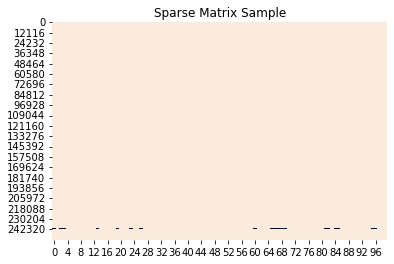

In [30]:
sns.heatmap(X_train.todense()[:,np.random.randint(0,X.shape[1],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Sample')

In [31]:
word = "wheelchair"
dic_vocabulary[word]

9754

In [64]:
y = dtf_train["y"]
X_names = vectorizer.get_feature_names()
p_value_limit = 0.95
dtf_features = pd.DataFrame()
#chi2_selector = SelectKBest(chi2, k=2)
#X_kbest = chi2_selector.fit_transform(X, y)
for cat in np.unique(y):
    chi2, p = feature_selection.chi2(X_train, y==cat)
    X_train_kbest = kbest.fit_transform(X_train, y)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "y":cat}))
    dtf_features = dtf_features.sort_values(["y","score"], 
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names = dtf_features["feature"].unique().tolist()

NameError: name 'feature_selection' is not defined

In [65]:
for cat in np.unique(y):
   print("# {}:".format(cat))
   print("  . selected features:",
         len(dtf_features[dtf_features["y"]==cat]))
   print("  . top features:", ",".join(
dtf_features[dtf_features["y"]==cat]["feature"].values[:10]))
   print(" ")

# 0:


KeyError: 'y'

In [66]:
# Bayes Theorem
classifier = naive_bayes.MultinomialNB()

In [67]:
## pipeline
model = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", classifier)])
## train classifier
model["classifier"].fit(X_train, y_train)
## test
X_test = dtf_test["text_clean"].values
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)

In [82]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
y = y.reshape(-1,1)
accuracy = metrics.accuracy_score(y_test, predicted)
auc = metrics.roc_auc_score(y_test, predicted_prob)
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, predicted))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           predicted_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], predicted_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

AttributeError: 'Series' object has no attribute 'reshape'

# Test 4: https://medium.com/swlh/text-classification-using-tf-idf-7404e75565b8

In [86]:
dataset = pd.read_csv("./Data/train_data.csv")
dataset = dataset.set_index("Index")
dataset.head()

/var/folders/rn/k7vf4gp97fb11dzjbcr7w8bc0000gn/T/ipykernel_73583/750855279.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("./Data/train_data.csv")


,Venue Index,Name,Date,Rating,Rating Sent,Text,Aspect,Accessibility,Term1,Term2,Term3
Index,,,,,,,,,,,
18594,10,coffeeshop la grotte,2019,5 stars,positive,2nd year coming here and can t say enough good...,0,0,NaN,NaN,NaN
373579,451,pata negra,2019,5 stars,positive,excellent,0,0,NaN,NaN,NaN
128693,112,bagels & beans ijdock,2021,5 stars,positive,"location, very nice and welcoming, with a spl...",0,0,NaN,NaN,NaN
120681,17,plum,2020,5 stars,positive,went to this place on saturday. i had the gril...,0,0,NaN,NaN,NaN
162003,504,caf‚àö¬© thijssen,2021,5 stars,positive,was wer very tasty,0,0,NaN,NaN,NaN


In [102]:
# Importing the libraries
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re

# Defining a Function to clean up the reviews 
def text_preprocess(ds):
    """
    Apply NLP Preprocessing Techniques to the reviews.
    """ 
    ds = re.sub('[^a-zA-Z]', ' ', ds)                                 # Retain only alphabets
    ds = (ds.lower()).split()
    ds = [w for w in ds if not w in set(stopwords.words('english'))]  # Remove stopwords

    lem = WordNetLemmatizer()
    ds = [lem.lemmatize(w) for w in ds if len(w) > 1]                 # Group different forms of the same word

    ds = ' '.join(ds)

    return ds

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/LizzyDRB/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
dataset['reviews'] = dataset['Text'].apply(text_preprocess)